`jupyter notebook --ip=0.0.0.0 --no-browser --port=9900`


#**Documentation (Data Processing)** - Measuring urban Cold Air Flow patterns with drones

In [ ]:
import os
import pandas as pd
from datetime import datetime

In [ ]:
# Verzeichnisse festlegen
user_dir = os.path.expanduser("~")

data_uav_dir = os.path.join(user_dir, "OneDrive - UT Cloud", "01_Geo", "2. Semester", "z_Kaltluftprojekt", "Data_UAV")
data_bme280_dir = os.path.join(user_dir, "OneDrive - UT Cloud", "01_Geo", "2. Semester", "z_Kaltluftprojekt", "Data_BME280")

In [ ]:
# Datumsauswahl
start_date = datetime(2024, 9, 6)
end_date = datetime(2024, 9, 6)

##Einlesen der UAV-Daten

In [ ]:
# Funktion zum Einlesen der UAV-Daten
def read_uav_data(start_date, end_date):
    uav_files = []
    for file_name in os.listdir(data_uav_dir):
        # Überprüfen, ob der Dateiname das Datum enthält
        try:
            file_date_str = "-".join(file_name.split("-")[:3])  # Datum aus Dateiname extrahieren (z.B. 2024-08-28)
            file_date = datetime.strptime(file_date_str, "%Y-%m-%d")

            # Filtere Dateien, die im gewünschten Datumsbereich liegen
            if start_date <= file_date <= end_date:
                file_path = os.path.join(data_uav_dir, file_name)
                uav_files.append(pd.read_csv(file_path))
        except Exception as e:
            print(f"Datei {file_name} übersprungen aufgrund eines Fehlers: {e}")

    # Alle relevanten UAV-Daten chronologisch verknüpfen
    if uav_files:
        uav_data = pd.concat(uav_files, ignore_index=True).sort_values(by="datetime(utc)")

        # Zeitkorrektur um +2 Stunden
        if 'datetime(utc)' in uav_data.columns:
            uav_data['datetime(utc)'] = pd.to_datetime(uav_data['datetime(utc)']) + pd.Timedelta(hours=2)

        return uav_data
    else:
        print("Keine passenden UAV-Daten gefunden.")
        return pd.DataFrame()


##Einlesen der BME280-Daten

In [ ]:
# Funktion zum Einlesen der BME280-Sensordaten
def read_bme280_data():
    bme280_file = os.path.join(data_bme280_dir, "BME280_data.csv")
    try:
        bme280_data = pd.read_csv(bme280_file, parse_dates=[['Date', 'Time']])
        return bme280_data
    except Exception as e:
        print(f"Fehler beim Einlesen der BME280-Daten: {e}")
        return pd.DataFrame()

# UAV-Daten einlesen
uav_data = read_uav_data(start_date, end_date)

# BME280-Daten einlesen
bme280_data = read_bme280_data()

# UAV-Daten anzeigen
print("UAV-Daten:")
display(uav_data)

# BME280-Daten anzeigen
print("\nBME280-Daten:")
display(bme280_data)


UAV-Daten:


time(millisecond)       datetime(utc)   latitude  longitude  \
0                 104600 2024-09-06 19:20:27  48.525944   9.068214   
1                 104700 2024-09-06 19:20:27  48.525944   9.068214   
2                 104800 2024-09-06 19:20:27  48.525944   9.068214   
3                 104900 2024-09-06 19:20:27  48.525944   9.068214   
4                 105000 2024-09-06 19:20:27  48.525944   9.068214   
...                  ...                 ...        ...        ...   
13938             743870 2024-09-06 20:23:51  48.526546   9.071149   
13937             743780 2024-09-06 20:23:51  48.526546   9.071148   
13936             743620 2024-09-06 20:23:51  48.526546   9.071148   
13940             744070 2024-09-06 20:23:51  48.526545   9.071149   
13946             744670 2024-09-06 20:23:52  48.526544   9.071148   

       height_above_takeoff(meters)  \
0                              17.9   
1                              18.0   
2                              18.0   
3                              18.1   
4                              18.1   
...                             ...   
13938                           0.0   
13937                           0.0   
13936                           0.0   
13940                           0.0   
13946                           0.0   

      height_above_ground_at_drone_location(meters)  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
...                                             ...   
13938                                           NaN   
13937                                           NaN   
13936                                           NaN   
13940                                           NaN   
13946                                           NaN   

      ground_elevation_at_drone_location(meters)  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
...                                          ...   
13938                                        NaN   
13937                                        NaN   
13936                                        NaN   
13940                                        NaN   
13946                                        NaN   

       altitude_above_seaLevel(meters)  height_sonar(meters)  speed(m/s)  \
0                           393.155218                   0.0       0.806   
1                           393.255219                   0.0       0.707   
2                           393.255219                   0.0       0.608   
3                           393.355218                   0.0       0.500   
4                           393.355218                   0.0       0.300   
...                                ...                   ...         ...   
13938                       377.091034                   0.0       0.200   
13937                       377.091034                   0.0       0.300   
13936                       377.091034                   0.0       0.300   
13940                       377.091034                   0.0       0.141   
13946                       377.091034                   0.0       0.224   

       distance(meters)  mileage(meters)  satellites  gpslevel  voltage(v)  \
0             226.14400          271.101          23         0       7.794   
1             226.14400          271.101          23         0       7.794   
2             226.14400          271.101          23         0       7.794   
3             226.14400          271.101          24         0       7.794   
4             226.14400          271.101          24         0       7.877   
...                 ...       


BME280-Daten:


Date_Time  Temperature (°C)  Pressure (hPa)  \
0    2024-08-27 09:14:08.990441         22.813058      983.978319   
1    2024-08-27 09:14:11.664898         22.808017      983.970427   
2    2024-08-27 09:14:13.685699         22.813058      983.978319   
3    2024-08-27 09:14:15.706575         22.808017      983.970427   
4    2024-08-27 09:14:17.727397         22.813058      983.896700   
...                         ...               ...             ...   
9401 2024-09-06 19:32:13.946399         23.090319      969.716972   
9402 2024-09-06 19:32:14.216538         23.075196      969.693653   
9403 2024-09-06 19:32:14.486827         23.075196      969.720862   
9404 2024-09-06 19:32:14.757088         23.060073      969.670335   
9405 2024-09-06 19:32:15.027276         23.055032      969.689770   

      Humidity (%)  
0        55.661454  
1        55.510659  
2        55.421590  
3        55.365622  
4        55.343490  
...            ...  
9401     70.358117  
9402     70.529328  
9403     70.634905  
9404     70.311555  
9405     70.055579  

[9406 rows x 4 columns]

##Zuordnen der nächstgelegenen BME280-Daten zu den UAV-Daten basierend auf dem Zeitstempel

In [ ]:
# Funktion zum Zuordnen der nächstgelegenen BME280-Daten zu den UAV-Daten basierend auf dem Zeitstempel
def merge_uav_bme280(uav_data, bme280_data):
    # Sicherstellen, dass beide Zeitstempel Spalten als datetime formatiert sind
    uav_data['datetime(utc)'] = pd.to_datetime(uav_data['datetime(utc)'])
    bme280_data['Date_Time'] = pd.to_datetime(bme280_data['Date_Time'])

    # Verwende pandas merge_asof, um die nächstgelegene BME280-Zeile für jede UAV-Zeile zu finden
    merged_data = pd.merge_asof(
        uav_data.sort_values('datetime(utc)'),
        bme280_data.sort_values('Date_Time'),
        left_on='datetime(utc)',  # UAV Zeitstempel
        right_on='Date_Time',     # BME280 Zeitstempel
        direction='backward'      # Nächstgelegene Zeit in der Vergangenheit
    )

    return merged_data

# Beispiel zum Aufrufen der Funktion nach dem Einlesen der UAV- und BME280-Daten
merged_data = merge_uav_bme280(uav_data, bme280_data)

# Zeige die zusammengeführten Daten an
display(merged_data)

time(millisecond)       datetime(utc)   latitude  longitude  \
0                 104600 2024-09-06 19:20:27  48.525944   9.068214   
1                 104700 2024-09-06 19:20:27  48.525944   9.068214   
2                 104800 2024-09-06 19:20:27  48.525944   9.068214   
3                 104900 2024-09-06 19:20:27  48.525944   9.068214   
4                 105000 2024-09-06 19:20:27  48.525944   9.068214   
...                  ...                 ...        ...        ...   
13942             744370 2024-09-06 20:23:51  48.526544   9.071149   
13943             744460 2024-09-06 20:23:51  48.526544   9.071148   
13944             744270 2024-09-06 20:23:51  48.526544   9.071149   
13945             744570 2024-09-06 20:23:51  48.526544   9.071148   
13946             744670 2024-09-06 20:23:52  48.526544   9.071148   

       height_above_takeoff(meters)  \
0                              17.9   
1                              18.0   
2                              18.0   
3                              18.1   
4                              18.1   
...                             ...   
13942                           0.0   
13943                           0.0   
13944                           0.0   
13945                           0.0   
13946                           0.0   

      height_above_ground_at_drone_location(meters)  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
...                                             ...   
13942                                           NaN   
13943                                           NaN   
13944                                           NaN   
13945                                           NaN   
13946                                           NaN   

      ground_elevation_at_drone_location(meters)  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
...                                          ...   
13942                                        NaN   
13943                                        NaN   
13944                                        NaN   
13945                                        NaN   
13946                                        NaN   

       altitude_above_seaLevel(meters)  height_sonar(meters)  speed(m/s)  \
0                           393.155218                   0.0       0.806   
1                           393.255219                   0.0       0.707   
2                           393.255219                   0.0       0.608   
3                           393.355218                   0.0       0.500   
4                           393.355218                   0.0       0.300   
...                                ...                   ...         ...   
13942                       377.091034                   0.0       0.224   
13943                       377.091034                   0.0       0.224   
13944                       377.091034                   0.0       0.173   
13945                       377.091034                   0.0       0.141   
13946                       377.091034                   0.0       0.224   

       distance(meters)  mileage(meters)  satellites  gpslevel  voltage(v)  \
0             226.14400          271.101          23         0       7.794   
1             226.14400          271.101          23         0       7.794   
2             226.14400          271.101          23         0       7.794   
3             226.14400          271.101          24         0       7.794   
4             226.14400          271.101          24         0       7.877   
...                 ...       

##Trennen der UAV-Daten basierend auf einem Zeitunterschied von 5 Minuten

In [ ]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)


# Funktion zum Trennen der UAV-Daten basierend auf einem Zeitunterschied von 5 Minuten
def split_uav_data_by_time(merged_data, time_diff_minutes=5):
    # Berechne die Zeitdifferenz zwischen aufeinanderfolgenden Zeilen
    merged_data['time_diff'] = merged_data['datetime(utc)'].diff().dt.total_seconds() / 60.0

    # Liste zur Speicherung der getrennten DataFrames
    separated_dataframes = []

    # Startindex für den ersten DataFrame
    start_idx = 0

    # Überprüfe den Zeitunterschied und trenne, wenn er größer als 5 Minuten ist
    for idx, row in merged_data.iterrows():
        if row['time_diff'] > time_diff_minutes:
            flight_df = merged_data.iloc[start_idx:idx].copy()
            start_time = flight_df['datetime(utc)'].iloc[0]
            end_time = flight_df['datetime(utc)'].iloc[-1]
            flight_title = f"{start_time.strftime('%Y-%m-%d %H-%M-%S')} to {end_time.strftime('%H-%M-%S')}"
            separated_dataframes.append((flight_title, flight_df))
            start_idx = idx

    # Füge den letzten Abschnitt hinzu
    flight_df = merged_data.iloc[start_idx:].copy()
    start_time = flight_df['datetime(utc)'].iloc[0]
    end_time = flight_df['datetime(utc)'].iloc[-1]
    flight_title = f"{start_time.strftime('%Y-%m-%d %H-%M-%S')} to {end_time.strftime('%H-%M-%S')}"
    separated_dataframes.append((flight_title, flight_df))

    # Entferne die 'time_diff'-Spalte
    for _, df in separated_dataframes:
        df.drop(columns=['time_diff'], inplace=True)

    return separated_dataframes

# Beispiel für das Zusammenführen und Trennen der Daten
merged_data = merge_uav_bme280(uav_data, bme280_data)
separated_dataframes = split_uav_data_by_time(merged_data)

# Anzeigen der getrennten DataFrames mit den BME280-Daten
for title, df in separated_dataframes:
    print(f"\n{title}")
    display(df)



2024-09-06 19-20-27 to 19-31-17


time(millisecond)       datetime(utc)   latitude  longitude  \
0                104600 2024-09-06 19:20:27  48.525944   9.068214   
1                104700 2024-09-06 19:20:27  48.525944   9.068214   
2                104800 2024-09-06 19:20:27  48.525944   9.068214   
3                104900 2024-09-06 19:20:27  48.525944   9.068214   
4                105000 2024-09-06 19:20:27  48.525944   9.068214   
...                 ...                 ...        ...        ...   
6498             754830 2024-09-06 19:31:17  48.526563   9.071122   
6499             754930 2024-09-06 19:31:17  48.526563   9.071123   
6500             755030 2024-09-06 19:31:17  48.526563   9.071123   
6501             755130 2024-09-06 19:31:17  48.526563   9.071124   
6502             755230 2024-09-06 19:31:17  48.526563   9.071125   

      height_above_takeoff(meters)  \
0                             17.9   
1                             18.0   
2                             18.0   
3                             18.1   
4                             18.1   
...                            ...   
6498                           0.0   
6499                           0.0   
6500                           0.0   
6501                           0.0   
6502                           0.0   

     height_above_ground_at_drone_location(meters)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
6498                                           NaN   
6499                                           NaN   
6500                                           NaN   
6501                                           NaN   
6502                                           NaN   

     ground_elevation_at_drone_location(meters)  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
6498                                        NaN   
6499                                        NaN   
6500                                        NaN   
6501                                        NaN   
6502                                        NaN   

      altitude_above_seaLevel(meters)  height_sonar(meters)  speed(m/s)  \
0                          393.155218                   0.0       0.806   
1                          393.255219                   0.0       0.707   
2                          393.255219                   0.0       0.608   
3                          393.355218                   0.0       0.500   
4                          393.355218                   0.0       0.300   
...                               ...                   ...         ...   
6498                       375.255219                   0.0       0.447   
6499                       375.255219                   0.0       0.510   
6500                       375.255219                   0.0       0.500   
6501                       375.255219                   0.0       0.608   
6502                       375.255219                   0.0       0.632   

      distance(meters)  mileage(meters)  satellites  gpslevel  voltage(v)  \
0            226.14400          271.101          23         0       7.794   
1            226.14400          271.101          23         0       7.794   
2            226.14400          271.101          23         0       7.794   
3            226.14400          271.101          24         0       7.794   
4            226.14400          271.101          24         0       7.877   
...                ...              ...         ...       ...         ...   
6498           1.5


2024-09-06 20-11-27 to 20-23-52


time(millisecond)       datetime(utc)   latitude  longitude  \
6503                   0 2024-09-06 20:11:27  48.526528   9.071144   
6504                 200 2024-09-06 20:11:27  48.526528   9.071144   
6505                 100 2024-09-06 20:11:27  48.526528   9.071144   
6506                 490 2024-09-06 20:11:27  48.526527   9.071143   
6507                 390 2024-09-06 20:11:27  48.526528   9.071143   
...                  ...                 ...        ...        ...   
13942             744370 2024-09-06 20:23:51  48.526544   9.071149   
13943             744460 2024-09-06 20:23:51  48.526544   9.071148   
13944             744270 2024-09-06 20:23:51  48.526544   9.071149   
13945             744570 2024-09-06 20:23:51  48.526544   9.071148   
13946             744670 2024-09-06 20:23:52  48.526544   9.071148   

       height_above_takeoff(meters)  \
6503                            0.8   
6504                            1.1   
6505                            1.0   
6506                            1.3   
6507                            1.3   
...                             ...   
13942                           0.0   
13943                           0.0   
13944                           0.0   
13945                           0.0   
13946                           0.0   

      height_above_ground_at_drone_location(meters)  \
6503         Available with any HD 360 subscription   
6504                                            NaN   
6505                                            NaN   
6506                                            NaN   
6507                                            NaN   
...                                             ...   
13942                                           NaN   
13943                                           NaN   
13944                                           NaN   
13945                                           NaN   
13946                                           NaN   

      ground_elevation_at_drone_location(meters)  \
6503      Available with any HD 360 subscription   
6504                                         NaN   
6505                                         NaN   
6506                                         NaN   
6507                                         NaN   
...                                          ...   
13942                                        NaN   
13943                                        NaN   
13944                                        NaN   
13945                                        NaN   
13946                                        NaN   

       altitude_above_seaLevel(meters)  height_sonar(meters)  speed(m/s)  \
6503                        377.891034                   1.9       1.404   
6504                        378.191034                   2.2       1.100   
6505                        378.091034                   2.1       1.304   
6506                        378.391034                   2.4       0.400   
6507                        378.391034                   2.3       0.600   
...                                ...                   ...         ...   
13942                       377.091034                   0.0       0.224   
13943                       377.091034                   0.0       0.224   
13944                       377.091034                   0.0       0.173   
13945                       377.091034                   0.0       0.141   
13946                       377.091034                   0.0       0.224   

       distance(meters)  mileage(meters)  satellites  gpslevel  voltage(v)  \
6503           0.000000         0.000000          19         0       8.368   
6504           0.000000         0.000000          19         0       8.368   
6505           0.000000         0.000000          19         0       8.368   
6506           0.133383         0.184855          19         0       8.368   
6507           0.073649         0.073649          19         0       8.368   
...                 ...       

##3D Data Plot

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

# Sicherstellen, dass das Plot im Colab-Notebook angezeigt wird
pio.renderers.default = 'colab'

# Funktion zum Plotten von UAV-Flugpfaden in 3D mit Temperaturvisualisierung und vereinfachten Achsen
def plot_uav_flights_simple_plotly(separated_dataframes):
    for title, df in separated_dataframes:
        # Filtere Zeilen mit fehlenden Werten in den relevanten Spalten
        df_cleaned = df.dropna(subset=['latitude', 'longitude', 'altitude_above_seaLevel(meters)', 'Temperature (°C)'])

        if df_cleaned.empty:
            print(f"Skipping {title} due to insufficient valid data.")
            continue

        # Relevante Daten extrahieren
        latitudes = df_cleaned['latitude']
        longitudes = df_cleaned['longitude']
        altitudes = df_cleaned['altitude_above_seaLevel(meters)']
        temperatures = df_cleaned['Temperature (°C)']

        # Temperaturbereich berechnen
        temp_min = temperatures.min()
        temp_max = temperatures.max()

        # 3D-Scatter Plot der Flugbahnen mit Farbskala für die Temperatur
        fig = go.Figure(data=go.Scatter3d(
            x=longitudes,
            y=latitudes,
            z=altitudes,
            mode='markers',
            marker=dict(
                size=5,
                color=temperatures,  # Farbe nach Temperaturwerten
                colorscale='portland',  # Ähnliches Farbthema wie in Matplotlib
                cmin=temp_min,  # Minimale Temperatur für die Farbskala
                cmax=temp_max,  # Maximale Temperatur für die Farbskala
                colorbar=dict(title="Temperature (°C)"),  # Farbleiste
            )
        ))

        # Layout-Anpassungen, Achsen und Titel hinzufügen
        fig.update_layout(
            title=f'Flight Path: {title} with Temperature Visualization',
            scene=dict(
                xaxis_title='Longitude',
                yaxis_title='Latitude',
                zaxis_title='Altitude (meters)',
                xaxis=dict(tickformat=".6f"),  # Sechs Dezimalstellen für Längengrad
                yaxis=dict(tickformat=".6f"),  # Sechs Dezimalstellen für Breitengrad
                zaxis=dict(),
            )
        )

        # Zeige den Plot im Notebook
        fig.show()

# Beispiel für die Aufruf der Funktion mit mehreren DataFrames
plot_uav_flights_simple_plotly(separated_dataframes)


##Interpolate 3D Data Plot

In [678]:
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata
import plotly.io as pio

# Sicherstellen, dass das Plot im Browser geöffnet wird
pio.renderers.default = 'colab'

# Funktion zum Erstellen eines 3D-Punktwolkenplots mit Temperaturinterpolation
def plot_uav_flights_3d_points(separated_dataframes):
    for title, df in separated_dataframes:
        # Filtere Zeilen mit fehlenden Werten in den relevanten Spalten
        df_cleaned = df.dropna(subset=['latitude', 'longitude', 'altitude_above_seaLevel(meters)', 'Temperature (°C)'])

        if df_cleaned.empty:
            print(f"Skipping {title} due to insufficient valid data.")
            continue

        # Relevante Daten extrahieren
        latitudes = df_cleaned['latitude']
        longitudes = df_cleaned['longitude']
        altitudes = df_cleaned['altitude_above_seaLevel(meters)']
        temperatures = df_cleaned['Temperature (°C)']

        # Definiere ein Gitter für Breiten-, Längengrad und Höhe
        grid_size = 25  # Passe dies für mehr/weniger Detail an
        xi = np.linspace(latitudes.min(), latitudes.max(), grid_size)
        yi = np.linspace(longitudes.min(), longitudes.max(), grid_size)
        zi = np.linspace(altitudes.min(), altitudes.max(), grid_size)

        # Erstelle ein Meshgrid zur Interpolation
        X, Y, Z = np.meshgrid(xi, yi, zi)

        # Interpolation der Temperaturdaten auf das Gitter
        points = np.array([latitudes, longitudes, altitudes]).T
        grid_values = griddata(points, temperatures, (X, Y, Z), method='nearest')

        # NaN-Werte in der Gitterinterpolation behandeln
        grid_values = np.nan_to_num(grid_values)  # Ersetze NaNs durch Nullen für saubere Punktwolken-Darstellung

        # Berechne den Temperaturbereich
        temp_min = np.min(temperatures)
        temp_max = np.max(temperatures)

        # Maskiere die Nullwerte (filtere sie heraus)
        non_zero_mask = grid_values.flatten() != 0  # Maske für alle Punkte, die ungleich Null sind

        # Wende die Maske auf alle Daten an (nur Punkte ohne Nulltemperaturen werden gerendert)
        X_filtered = X.flatten()[non_zero_mask]
        Y_filtered = Y.flatten()[non_zero_mask]
        Z_filtered = Z.flatten()[non_zero_mask]
        grid_values_filtered = grid_values.flatten()[non_zero_mask]

        # Erzeuge die Punktwolke aus den gefilterten interpolierten Werten
        fig = go.Figure(data=go.Scatter3d(
            x=X_filtered,
            y=Y_filtered,
            z=Z_filtered,
            mode='markers',
            marker=dict(
                size=7,
                color=grid_values_filtered,  # Setze Farbe auf Temperatur
                colorscale='portland',  # Farbskala für Temperatur
                cmin=temp_min,  # Setze das Minimum der Farbskala auf den tatsächlichen Temperatur-Minimumwert
                cmax=temp_max,  # Setze das Maximum der Farbskala auf den tatsächlichen Temperatur-Maximumwert
                colorbar=dict(title="Temperature (°C)"),
                opacity=0.2
            )
        ))

        # Layout mit Tick-Labels für Breiten-, Längengrad und Höhe anpassen
        fig.update_layout(
            title=f'Flight Path: {title} - 3D Interpolated Point Cloud',
            scene=dict(
                xaxis=dict(
                    title='Longitude',
                    showticklabels=True,
                    tickmode='linear',
                    tick0=longitudes.min(),
                    dtick=(longitudes.max() - longitudes.min()) / 5
                ),
                yaxis=dict(
                    title='Latitude',
                    showticklabels=True,
                    tickmode='linear',
                    tick0=latitudes.min(),
                    dtick=(latitudes.max() - latitudes.min()) / 3
                ),
                zaxis=dict(
                    title='Altitude (meters)',
                    showticklabels=True,
                    tickmode='linear',
                    tick0=altitudes.min(),
                    dtick=(altitudes.max() - altitudes.min()) / 5
                ),
            )
        )

        # Zeige die Figur im Browser an
        fig.show()

# Aufruf der Funktion zum Plotten der Flugbahnen
plot_uav_flights_3d_points(separated_dataframes)


In [679]:
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata
import pandas as pd

# Function to interpolate UAV data into a 3D grid for volume rendering
def interpolate_to_volume(df_cleaned, grid_size=50):
    latitudes = df_cleaned['latitude']
    longitudes = df_cleaned['longitude']
    altitudes = df_cleaned['altitude_above_seaLevel(meters)']
    temperatures = df_cleaned['Temperature (°C)']

    # Define 3D grid for interpolation
    xi = np.linspace(latitudes.min(), latitudes.max(), grid_size)
    yi = np.linspace(longitudes.min(), longitudes.max(), grid_size)
    zi = np.linspace(altitudes.min(), altitudes.max(), grid_size)

    grid_x, grid_y, grid_z = np.meshgrid(xi, yi, zi)

    # Interpolate temperature data on the grid
    points = np.array([latitudes, longitudes, altitudes]).T
    grid_temperatures = griddata(points, temperatures, (grid_x, grid_y, grid_z), method='linear')

    return grid_x, grid_y, grid_z, grid_temperatures

# Function to plot the UAV data as a volume
def plot_volume(grid_x, grid_y, grid_z, grid_temperatures):
    fig = go.Figure(data=go.Volume(
        x=grid_x.flatten(),
        y=grid_y.flatten(),
        z=grid_z.flatten(),
        value=grid_temperatures.flatten(),
        isomin=np.nanmin(grid_temperatures),
        isomax=np.nanmax(grid_temperatures),
        opacity=0.1,  # Adjust for transparency
        surface_count=25,  # Number of isosurfaces to plot
        colorscale='Portland',  # Choose color scale
        colorbar=dict(title="Temperature (°C)")
    ))

    # Customize layout
    fig.update_layout(scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Altitude / Elevation (m)'
    ))

    fig.show()

# Example usage with one of the separated dataframes
for title, df in separated_dataframes:
    df_cleaned = df.dropna(subset=['latitude', 'longitude', 'altitude_above_seaLevel(meters)', 'Temperature (°C)'])

    if df_cleaned.empty:
        print(f"Skipping {title} due to insufficient valid data.")
        continue

    # Interpolate the data to a 3D volume
    grid_x, grid_y, grid_z, grid_temperatures = interpolate_to_volume(df_cleaned)

    # Plot the 3D volume
    plot_volume(grid_x, grid_y, grid_z, grid_temperatures)


Output hidden; open in https://colab.research.google.com to view.

##DEM Vis

In [ ]:
import numpy as np
import rasterio
from rasterio.windows import from_bounds
import plotly.graph_objects as go

def map_plotly(tif_file, min_lon, min_lat, max_lon, max_lat, reduction=3, exageration=1, azimuth=130, elevation_angle=40):
    # Open the GeoTIFF file
    with rasterio.open(tif_file) as dataset:
        # Define the bounding box (Area of Interest)
        window = from_bounds(min_lon, min_lat, max_lon, max_lat, dataset.transform)

        # Read the first band (elevation data) within the AOI
        elevation = dataset.read(1, window=window)
        # Get the NoData value
        nodata = dataset.nodata
        # Extract the transform within the window for correct scaling
        transform = dataset.window_transform(window)

    # Replace the NoData value (-99999) with NaN
    elevation = np.where(elevation == nodata, np.nan, elevation)

    # Flip the array to correct orientation
    elevation = np.flipud(elevation)

    # Reduce the resolution of the image to improve speed
    x, y = elevation.shape
    reduced_elevation = elevation[::reduction, ::reduction] * exageration

    # Adjust the shape of X and Y to match reduced_elevation
    X, Y = np.meshgrid(np.linspace(min_lon, max_lon, reduced_elevation.shape[1]),
                       np.linspace(min_lat, max_lat, reduced_elevation.shape[0]))

    # Create the 3D surface plot with Plotly
    fig = go.Figure(data=[go.Surface(z=reduced_elevation, x=X, y=Y, colorscale='viridis', opacity=1)])

    # Set axis labels and adjust Z-limits
    fig.update_layout(
        scene=dict(
            xaxis_title='Longitude',
            yaxis_title='Latitude',
            zaxis_title='Elevation (m)',
            zaxis=dict(range=[0, np.nanmax(reduced_elevation)])
        ),
        width=800,  # Adjust figure width
        height=600,  # Adjust figure height
        title="3D Surface Plot of Elevation",
    )

    # Set the camera view directly using azimuth and elevation angles
    fig.update_layout(
        scene_camera=dict(
            eye=dict(x=np.cos(np.radians(azimuth)), y=np.sin(np.radians(azimuth)), z=np.sin(np.radians(elevation_angle)))
        )
    )

    # Show the interactive plot
    fig.show()

# File path to your GeoTIFF file
tif_file = r"C:\Users\GIS-Gott\OneDrive - UT Cloud\01_Geo\2. Semester\z_Kaltluftprojekt\FlugplanungDGM\DOM1\Oesterberg_DOM1_WGS84.tif"

# Define the AOI (Area of Interest)
min_lon, min_lat = 9.065, 48.520
max_lon, max_lat = 9.0775, 48.530

# Plot the map with AOI and rotation, using 'hsv' colormap and rotation parameters
map_plotly(tif_file, min_lon, min_lat, max_lon, max_lat, reduction=1, exageration=1, azimuth=130, elevation_angle=40)


Output hidden; open in https://colab.research.google.com to view.

##Visualize 3D Data Temperature and Terrain



In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import rasterio
from rasterio.windows import from_bounds

# Sicherstellen, dass das Plot im Colab-Notebook angezeigt wird
pio.renderers.default = 'colab'

# Function to compute hillshade from elevation data
def compute_hillshade(elevation, azimuth=315, angle_altitude=45):
    """Compute hillshade from elevation data."""
    x, y = np.gradient(elevation)
    slope = np.pi / 2.0 - np.arctan(np.sqrt(x * x + y * y))
    aspect = np.arctan2(-x, y)
    azimuth_rad = np.radians(azimuth)
    altitude_rad = np.radians(angle_altitude)

    shaded = np.sin(altitude_rad) * np.sin(slope) + np.cos(altitude_rad) * np.cos(slope) * np.cos(azimuth_rad - aspect)
    return 255 * (shaded + 1) / 2  # Normalize to 0-255

# Funktion zum Plotten von UAV-Flugpfaden und der Karte in separaten 3D Plots mit Hillshade
def plot_separate_uav_and_hillshade_map(separated_dataframes, tif_file, min_lon, min_lat, max_lon, max_lat, reduction=3, exageration=1, azimuth=130, elevation_angle=40):
    # Open the GeoTIFF file
    with rasterio.open(tif_file) as dataset:
        # Define the bounding box (Area of Interest)
        window = from_bounds(min_lon, min_lat, max_lon, max_lat, dataset.transform)

        # Read the first band (elevation data) within the AOI
        elevation = dataset.read(1, window=window)
        nodata = dataset.nodata
        transform = dataset.window_transform(window)

    # Replace the NoData value (-99999) with NaN
    elevation = np.where(elevation == nodata, np.nan, elevation)

    # Flip the array to correct orientation
    elevation = np.flipud(elevation)

    # Reduce the resolution of the image to improve speed
    reduced_elevation = elevation[::reduction, ::reduction] * exageration

    # Compute hillshade
    hillshade = compute_hillshade(reduced_elevation)

    # Adjust the shape of X and Y to match reduced_elevation
    X, Y = np.meshgrid(np.linspace(min_lon, max_lon, reduced_elevation.shape[1]),
                       np.linspace(min_lat, max_lat, reduced_elevation.shape[0]))

    # Create a separate plot for each UAV flight dataframe
    for title, df in separated_dataframes:
        df_cleaned = df.dropna(subset=['latitude', 'longitude', 'altitude_above_seaLevel(meters)', 'Temperature (°C)'])

        if df_cleaned.empty:
            print(f"Skipping {title} due to insufficient valid data.")
            continue

        # Extract relevant data
        latitudes = df_cleaned['latitude']
        longitudes = df_cleaned['longitude']
        altitudes = df_cleaned['altitude_above_seaLevel(meters)']
        temperatures = df_cleaned['Temperature (°C)']

        # Create a new figure for each dataframe
        fig = go.Figure()

        # Add the UAV flight path
        fig.add_trace(go.Scatter3d(
            x=longitudes,
            y=latitudes,
            z=altitudes,
            mode='markers',
            marker=dict(
                size=5,
                color=temperatures,
                colorscale='portland',
                cmin=temperatures.min(),
                cmax=temperatures.max(),
                colorbar=dict(title="Temperature (°C)"),
            ),
            name=f"Flight Path: {title}"
        ))

        # Add the surface plot (terrain map with hillshade)
        fig.add_trace(go.Surface(
            z=reduced_elevation,
            x=X,
            y=Y,
            surfacecolor=hillshade,
            colorscale='gray',
            showscale=False,  # Disable color bar for hillshade
            opacity=1,
            name="Elevation (Hillshade)"
        ))

        # Update layout with axis titles and camera view
        fig.update_layout(
            scene=dict(
                xaxis_title='Longitude',
                yaxis_title='Latitude',
                zaxis_title='Altitude / Elevation (m)',
                zaxis=dict(range=[0, np.nanmax(reduced_elevation)])
            ),
            width=800,
            height=600,
            title=f"UAV Flight Path and Terrain (Hillshade): {title}",
            scene_camera=dict(
                eye=dict(x=np.cos(np.radians(azimuth)), y=np.sin(np.radians(azimuth)), z=np.sin(np.radians(elevation_angle)))
            )
        )

        # Show the individual plot
        fig.show()

# Beispiel für die Aufruf der Funktion mit mehreren DataFrames und GeoTIFF
tif_file = r"C:\Users\GIS-Gott\OneDrive - UT Cloud\01_Geo\2. Semester\z_Kaltluftprojekt\FlugplanungDGM\DOM1\Oesterberg_DOM1_WGS84.tif"
min_lon, min_lat = 9.065, 48.520
max_lon, max_lat = 9.0775, 48.530

plot_separate_uav_and_hillshade_map(separated_dataframes, tif_file, min_lon, min_lat, max_lon, max_lat, reduction=1, exageration=1, azimuth=130, elevation_angle=40)


Output hidden; open in https://colab.research.google.com to view.

##Visualize 3D Data + Interpolated 3D Data, Temperature and Terrain

In [680]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import rasterio
from rasterio.windows import from_bounds
from scipy.interpolate import griddata
import pandas as pd

# Ensure the plot is displayed in the notebook
pio.renderers.default = 'colab'

# Function to compute hillshade from elevation data
def compute_hillshade(elevation, azimuth=315, angle_altitude=45):
    """Compute hillshade from elevation data."""
    x, y = np.gradient(elevation)
    slope = np.pi / 2.0 - np.arctan(np.sqrt(x * x + y * y))
    aspect = np.arctan2(-x, y)
    azimuth_rad = np.radians(azimuth)
    altitude_rad = np.radians(angle_altitude)

    shaded = np.sin(altitude_rad) * np.sin(slope) + np.cos(altitude_rad) * np.cos(slope) * np.cos(azimuth_rad - aspect)
    return 255 * (shaded + 1) / 2  # Normalize to 0-255

# Function to interpolate and store the data in a DataFrame
def interpolate_and_store_data(df_cleaned):
    latitudes = df_cleaned['latitude']
    longitudes = df_cleaned['longitude']
    altitudes = df_cleaned['altitude_above_seaLevel(meters)']
    temperatures = df_cleaned['Temperature (°C)']

    # Define a 3D grid for interpolation
    grid_size = 25  # Adjust grid size for more or less detail
    xi = np.linspace(latitudes.min(), latitudes.max(), grid_size)
    yi = np.linspace(longitudes.min(), longitudes.max(), grid_size)
    zi = np.linspace(altitudes.min(), altitudes.max(), grid_size)

    # Interpolate temperature data using 'linear' method for more realistic temperature variation
    points = np.array([latitudes, longitudes, altitudes]).T
    grid_x, grid_y, grid_z = np.meshgrid(xi, yi, zi)

    grid_temperatures = griddata(points, temperatures, (grid_x, grid_y, grid_z), method='linear')

    # Create a DataFrame with the interpolated data
    df_interpolated = pd.DataFrame({
        'latitude': grid_x.flatten(),
        'longitude': grid_y.flatten(),
        'altitude': grid_z.flatten(),
        'temperature': grid_temperatures.flatten()
    })

    # Drop rows where temperature is NaN
    df_interpolated = df_interpolated.dropna(subset=['temperature'])

    return df_interpolated

# Function to plot interpolated temperature data points and terrain with hillshade
def plot_interpolated_points_and_terrain(separated_dataframes, tif_file, min_lon, min_lat, max_lon, max_lat, reduction=3, exageration=1, azimuth=130, elevation_angle=40):
    # Open the GeoTIFF file
    with rasterio.open(tif_file) as dataset:
        # Define the bounding box (Area of Interest)
        window = from_bounds(min_lon, min_lat, max_lon, max_lat, dataset.transform)

        # Read the first band (elevation data) within the AOI
        elevation = dataset.read(1, window=window)
        nodata = dataset.nodata
        transform = dataset.window_transform(window)

    # Replace the NoData value (-99999) with NaN
    elevation = np.where(elevation == nodata, np.nan, elevation)

    # Flip the array to correct orientation
    elevation = np.flipud(elevation)

    # Reduce the resolution of the image to improve speed
    reduced_elevation = elevation[::reduction, ::reduction] * exageration

    # Compute hillshade
    hillshade = compute_hillshade(reduced_elevation)

    # Adjust the shape of X and Y to match reduced_elevation
    X, Y = np.meshgrid(np.linspace(min_lon, max_lon, reduced_elevation.shape[1]),
                       np.linspace(min_lat, max_lat, reduced_elevation.shape[0]))

    # Create a plot for the combined visualization
    for title, df in separated_dataframes:
        df_cleaned = df.dropna(subset=['latitude', 'longitude', 'altitude_above_seaLevel(meters)', 'Temperature (°C)'])

        if df_cleaned.empty:
            print(f"Skipping {title} due to insufficient valid data.")
            continue

        # Interpolate and store the data in a DataFrame
        df_interpolated = interpolate_and_store_data(df_cleaned)

        # Create a new figure
        fig = go.Figure()

        # Add the surface plot (terrain map with hillshade)
        fig.add_trace(go.Surface(
            z=reduced_elevation,
            x=X,
            y=Y,
            surfacecolor=hillshade,
            colorscale='gray',
            showscale=False,
            opacity=1,
            name="Elevation (Hillshade)"
        ))

# Add the interpolated 3D temperature point cloud from the DataFrame
        fig.add_trace(go.Scatter3d(
            x=df_interpolated['longitude'],
            y=df_interpolated['latitude'],
            z=df_interpolated['altitude'],
            mode='markers',
            marker=dict(
                size=7,
                sizemode='diameter',  # Ensures the size remains relative to the data coordinates
                color=df_interpolated['temperature'],
                colorscale='portland',
                cmin=df_interpolated['temperature'].min(),
                cmax=df_interpolated['temperature'].max(),
                colorbar=dict(title="Temperature (°C)"),
                opacity=0.2
            ),
            name="Interpolated Temperature Data"
        ))


        # Update layout with axis titles and camera view
        fig.update_layout(
            scene=dict(
                xaxis_title='Longitude',
                yaxis_title='Latitude',
                zaxis_title='Altitude / Elevation (m)',
                zaxis=dict(range=[0, np.nanmax(reduced_elevation)])
            ),
            width=1000,
            height=700,
            title=f"Interpolated Temperature and Terrain (Hillshade): {title}",
            scene_camera=dict(
                eye=dict(x=np.cos(np.radians(azimuth)), y=np.sin(np.radians(azimuth)), z=np.sin(np.radians(elevation_angle)))
            )
        )

        # Show the plot
        fig.show()

# Example call for multiple dataframes
tif_file = r"C:\Users\GIS-Gott\OneDrive - UT Cloud\01_Geo\2. Semester\z_Kaltluftprojekt\FlugplanungDGM\DOM1\Oesterberg_DOM1_WGS84.tif"
min_lon, min_lat = 9.065, 48.520
max_lon, max_lat = 9.0775, 48.530

plot_interpolated_points_and_terrain(separated_dataframes, tif_file, min_lon, min_lat, max_lon, max_lat, reduction=1, exageration=1, azimuth=130, elevation_angle=40)


Output hidden; open in https://colab.research.google.com to view.

##slicing and profiles

In [696]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

# Function to interpolate and store the data in a DataFrame
def interpolate_and_store_data(df_cleaned, grid_size=25):
    latitudes = df_cleaned['latitude']
    longitudes = df_cleaned['longitude']
    altitudes = df_cleaned['altitude_above_seaLevel(meters)']
    temperatures = df_cleaned['Temperature (°C)']

    # Define a 3D grid for interpolation
    xi = np.linspace(latitudes.min(), latitudes.max(), grid_size)
    yi = np.linspace(longitudes.min(), longitudes.max(), grid_size)
    zi = np.linspace(altitudes.min(), altitudes.max(), grid_size)

    # Interpolate temperature data using 'linear' method for more realistic temperature variation
    points = np.array([latitudes, longitudes, altitudes]).T
    grid_x, grid_y, grid_z = np.meshgrid(xi, yi, zi)

    grid_temperatures = griddata(points, temperatures, (grid_x, grid_y, grid_z), method='linear')

    # Create a DataFrame with the interpolated data
    df_interpolated = pd.DataFrame({
        'latitude': grid_x.flatten(),
        'longitude': grid_y.flatten(),
        'altitude': grid_z.flatten(),
        'temperature': grid_temperatures.flatten()
    })

    # Drop rows where temperature is NaN
    df_interpolated = df_interpolated.dropna(subset=['temperature'])

    return df_interpolated

# Function to calculate the distance of a point to the defined line
def point_to_line_distance(x0, y0, x1, y1, x2, y2):
    # Calculate the distance of point (x0, y0) to the line defined by (x1, y1) and (x2, y2)
    return np.abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1) / np.sqrt((y2 - y1)**2 + (x2 - x1)**2)

# Function to plot the temperature cross-section along the defined line
def plot_temperature_cross_section(df_interpolated, x1, y1, x2, y2, tolerance=0.1):
    """
    Plot temperature data for a cross-section along a line defined by (x1, y1) and (x2, y2).

    Parameters:
    - df_interpolated: DataFrame containing interpolated temperature data
    - x1, y1: Start point of the cutting line (longitude, latitude)
    - x2, y2: End point of the cutting line (longitude, latitude)
    - tolerance: Maximum distance from the line to include points in the cross-section
    """

    # Calculate the distance of each point to the cutting line
    df_interpolated['distance_to_line'] = point_to_line_distance(
        df_interpolated['longitude'], df_interpolated['latitude'], x1, y1, x2, y2
    )

    # Filter the data to get points near the line (within the given tolerance)
    cut_section = df_interpolated[df_interpolated['distance_to_line'] < tolerance]

    # Create the cross-section plot
    fig = go.Figure()

    # Add temperature data as a heatmap
    fig.add_trace(go.Heatmap(
        x=cut_section['longitude'],  # Longitude or Latitude for x-axis
        y=cut_section['altitude'],   # Altitude for y-axis
        z=cut_section['temperature'],  # Temperature data
        colorscale='portland',
        colorbar=dict(title='Temperature (°C)')
    ))

    # Update layout with axis titles
    fig.update_layout(
        title="Temperature Cross Section Along Defined Line",
        xaxis_title='Longitude (or Latitude)',
        yaxis_title='Altitude (m)',
        width=1000,
        height=700
    )

    fig.show()

# Example usage
# Assuming df_cleaned is the cleaned dataframe for the chosen data
df_cleaned = separated_dataframes[0][1].dropna(subset=['latitude', 'longitude', 'altitude_above_seaLevel(meters)', 'Temperature (°C)'])
df_interpolated = interpolate_and_store_data(df_cleaned)

# Define the start and end points of the cross-section line
x1, y1 = 9.061036, 48.52739  # Start point (longitude, latitude)
x2, y2 = 9.079865, 48.52732  # End point (longitude, latitude)

# Plot the cross-section
plot_temperature_cross_section(df_interpolated, x1, y1, x2, y2, tolerance=10)


##combined slicing with 3D plots

##other options

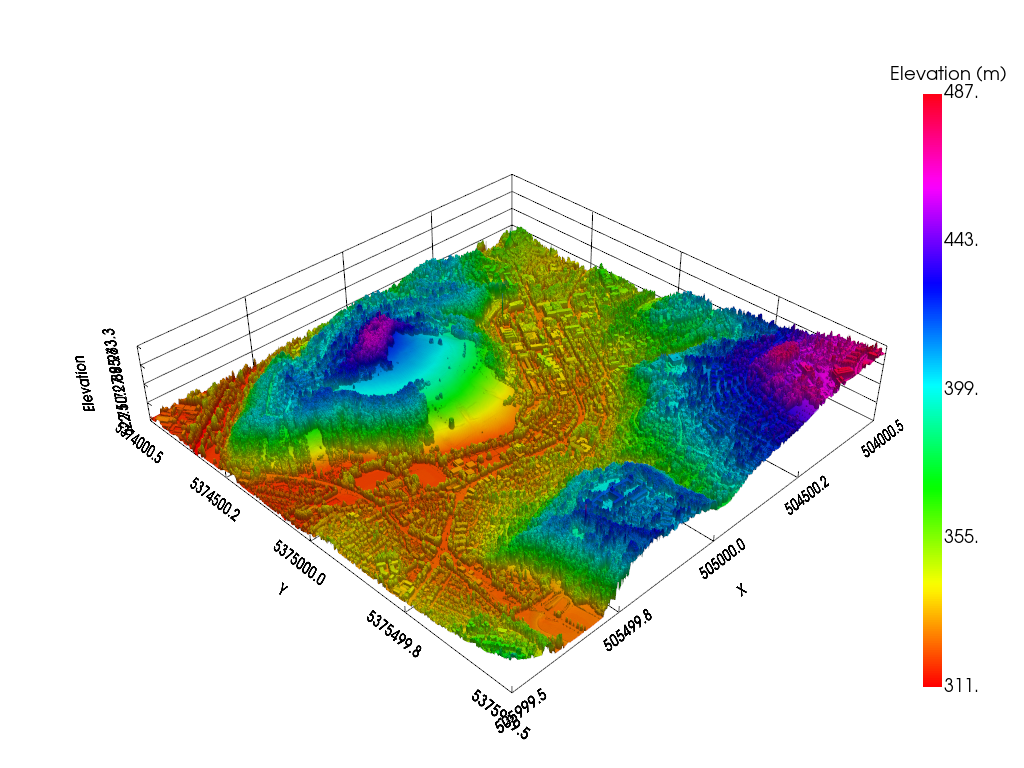

In [ ]:
import pyvista as pv
import rioxarray as riox
import numpy as np

# Set up PyVista to avoid using Jupyter backend
pv.global_theme.jupyter_backend = 'static'  # Disable the Jupyter backend

# Define the local file path and EPSG code (use your local setup)
file_path = r"C:\Users\GIS-Gott\OneDrive - UT Cloud\01_Geo\2. Semester\z_Kaltluftprojekt\FlugplanungDGM\DOM1\Oesterberg_DOM1.tif"
epsg_code = 25832  # ETRS89 / UTM zone 32N

# Read the data from the DEM file with rioxarray
data = riox.open_rasterio(file_path)
data = data[0]  # Extract the first (and only) band

# Save the raster data as a NumPy array
values = np.asarray(data)

# Create a mesh grid using the DEM's x and y coordinates
x, y = np.meshgrid(data['x'], data['y'])

# Set the z values as elevation data (from values) and create a StructuredGrid
z = values  # Use the elevation data directly as z-values

# Create the PyVista StructuredGrid
mesh = pv.StructuredGrid(x, y, z)

# Assign Elevation Values from the DEM to the mesh
mesh["Elevation"] = values.ravel(order='F')

# Warp the mesh by scalar to represent the terrain with a better scaling factor for z-axis
topo = mesh.warp_by_scalar(scalars="Elevation", factor=1.0)  # Adjust the factor as needed for better visualization

# Plot the elevation map using PyVista
p = pv.Plotter()

# Add the terrain mesh with the Viridis colormap and disable the default scalar bar
p.add_mesh(topo, scalars=topo["Elevation"], cmap='hsv', show_scalar_bar=False)

# Set the background color
p.set_background(color='white')

# Add the axes back with a smaller font size using `font_size`
p.show_bounds(grid='back', location='outer', xtitle='X', ytitle='Y', ztitle='Elevation', font_size=12)

# Add a vertical color bar (scalar bar)
p.add_scalar_bar(title="Elevation (m)", vertical=True, position_x=0.9, position_y=0.1, width=0.05, height=0.8)

# Show the plot
p.show()


In [ ]:
#davor hier noch 3d vis vom dem

In [ ]:
#hier dann profile aus den interpolationen

###Schrott der nicht ging

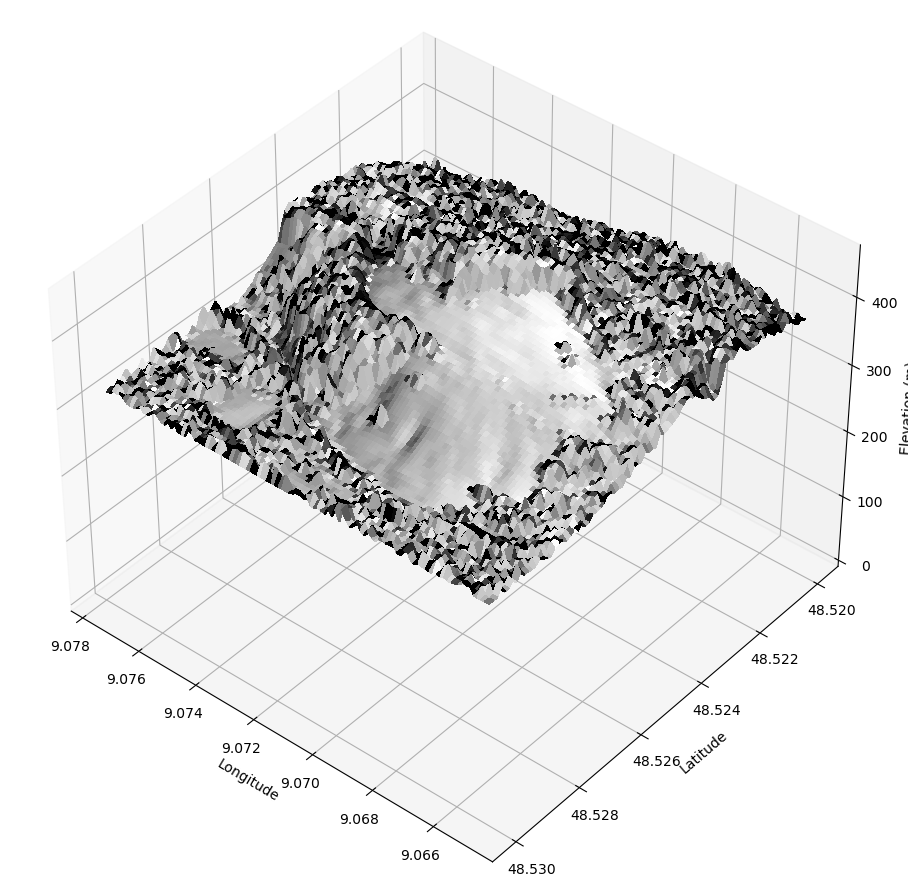

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.windows import from_bounds

# Custom hillshade function
def compute_hillshade(elevation, azimuth=315, angle_altitude=25):
    # Convert angles to radians
    azimuth = 360.0 - azimuth
    azimuth_rad = np.radians(azimuth)
    altitude_rad = np.radians(angle_altitude)

    # Calculate the gradient of the elevation data
    x, y = np.gradient(elevation)
    slope_rad = np.pi / 2.0 - np.arctan(np.sqrt(x*x + y*y))
    aspect_rad = np.arctan2(-x, y)

    # Calculate the hillshade
    hillshade = (np.sin(altitude_rad) * np.sin(slope_rad) +
                 np.cos(altitude_rad) * np.cos(slope_rad) * np.cos(azimuth_rad - aspect_rad))

    return hillshade.clip(0, 1)  # Normalize between 0 and 1

# Main plotting function
def map(tif_file, min_lon, min_lat, max_lon, max_lat, reduction=1, exageration=1, azimuth=130, elevation_angle=40, fig_size=(10, 8), sun_azimuth=315, sun_elevation=45):
    # Open the GeoTIFF file
    with rasterio.open(tif_file) as dataset:
        # Define the bounding box (Area of Interest)
        window = from_bounds(min_lon, min_lat, max_lon, max_lat, dataset.transform)

        # Read the first band (elevation data) within the AOI
        elevation = dataset.read(1, window=window)
        # Get the NoData value
        nodata = dataset.nodata
        # Extract the transform within the window for correct scaling
        transform = dataset.window_transform(window)

    # Replace the NoData value (-99999) with NaN
    elevation = np.where(elevation == nodata, np.nan, elevation)

    # Flip the array to correct orientation
    elevation = np.flipud(elevation)

    # Reduce the resolution of the image to improve speed
    reduced_elevation = elevation[::reduction, ::reduction] * exageration

    # Calculate hillshade from the elevation data
    hillshade_img = compute_hillshade(reduced_elevation, azimuth=sun_azimuth, angle_altitude=sun_elevation)

    # Adjust the shape of X and Y to match reduced_elevation
    X, Y = np.meshgrid(np.linspace(min_lon, max_lon, reduced_elevation.shape[1]),
                       np.linspace(min_lat, max_lat, reduced_elevation.shape[0]))

    # Create the figure with a specified size
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(projection='3d')
    ax.set_zlim([0, np.nanmax(reduced_elevation)])  # Adjust Z-limits based on data range, ignoring NaNs
    ax.plot_surface(X, Y, reduced_elevation, facecolors=plt.cm.gray(hillshade_img), rstride=1, cstride=1, antialiased=False, shade=False)

    # Set axis labels for geographic coordinates
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Elevation (m)')

    # Rotate the plot with azimuth and elevation angle
    ax.view_init(elev=elevation_angle, azim=azimuth)

    # Use tight layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

# File path to your GeoTIFF file
tif_file = r"C:\Users\GIS-Gott\OneDrive - UT Cloud\01_Geo\2. Semester\z_Kaltluftprojekt\FlugplanungDGM\DOM1\Oesterberg_DOM1_WGS84.tif"

# Define the AOI (Area of Interest)
min_lon, min_lat = 9.065, 48.520
max_lon, max_lat = 9.0775, 48.530

# Plot the map with AOI, rotation, and hillshade effect
map(tif_file, min_lon, min_lat, max_lon, max_lat, reduction=10, exageration=1, azimuth=130, elevation_angle=40, fig_size=(12, 9))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


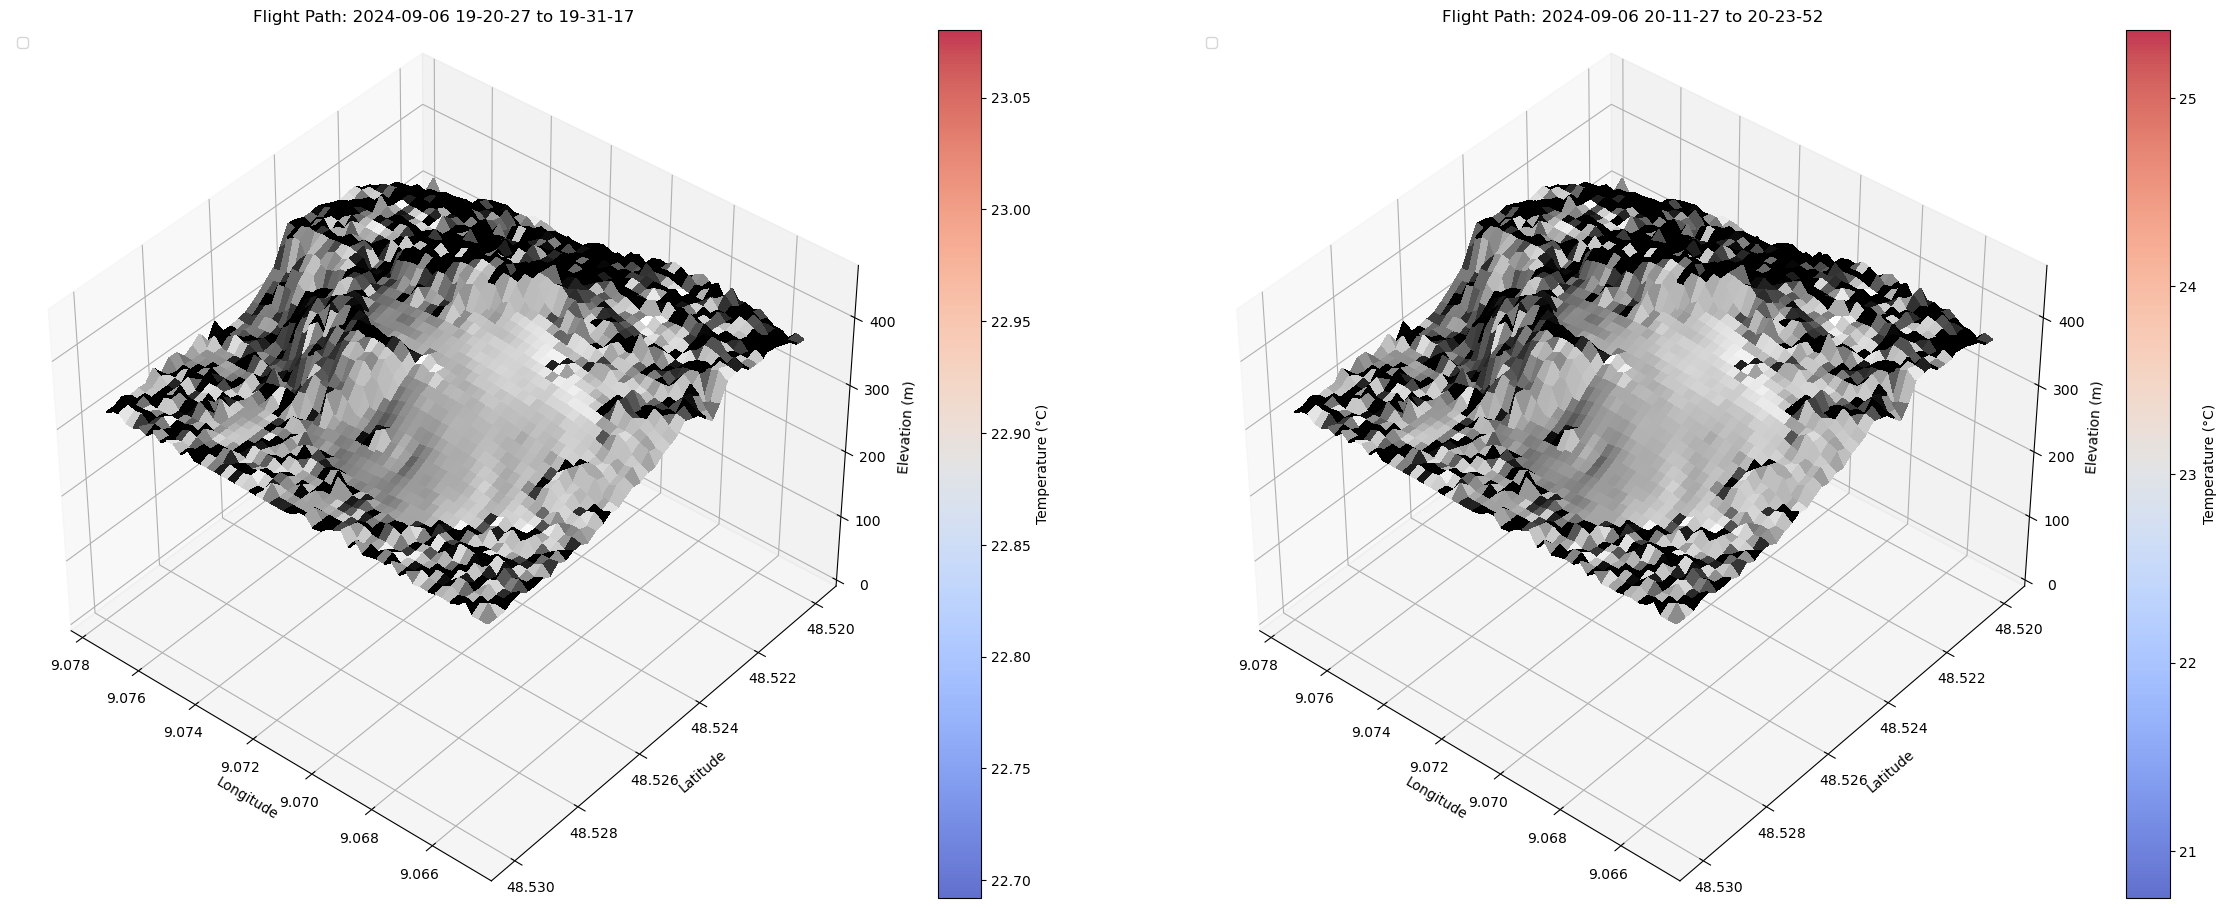

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.windows import from_bounds
from scipy.interpolate import griddata

# Custom hillshade function
def compute_hillshade(elevation, azimuth=315, angle_altitude=25):
    azimuth = 360.0 - azimuth
    azimuth_rad = np.radians(azimuth)
    altitude_rad = np.radians(angle_altitude)

    # Calculate the gradient of the elevation data
    x, y = np.gradient(elevation)
    slope_rad = np.pi / 2.0 - np.arctan(np.sqrt(x*x + y*y))
    aspect_rad = np.arctan2(-x, y)

    hillshade = (np.sin(altitude_rad) * np.sin(slope_rad) +
                 np.cos(altitude_rad) * np.cos(slope_rad) * np.cos(azimuth_rad - aspect_rad))

    return hillshade.clip(0, 1)  # Normalize between 0 and 1

# Function to adjust UAV altitudes based on DEM
def adjust_uav_altitudes(df, dem_lon, dem_lat, dem_elevation):
    # Interpolate DEM to get ground elevation at each UAV point
    points = np.array([(lon, lat) for lon, lat in zip(dem_lon.ravel(), dem_lat.ravel())])
    values = dem_elevation.ravel()

    # Interpolating to find the ground elevation under each UAV point
    interpolated_ground_elevations = griddata(points, values, (df['longitude'], df['latitude']), method='linear')

    # Adjust the altitude as per your formula
    df['adjusted_altitude'] = df['altitude_above_seaLevel(meters)'] + 125
    return df

# Main plotting function with UAV flight overlay and temperature visualization
def map_with_uav(tif_file, min_lon, min_lat, max_lon, max_lat, separated_dataframes, point_size=10, reduction=20, exageration=1, azimuth=130, elevation_angle=40, fig_size=(10, 8), sun_azimuth=315, sun_elevation=45):
    # Open the GeoTIFF file
    with rasterio.open(tif_file) as dataset:
        window = from_bounds(min_lon, min_lat, max_lon, max_lat, dataset.transform)
        elevation = dataset.read(1, window=window)
        nodata = dataset.nodata
        transform = dataset.window_transform(window)

    elevation = np.where(elevation == nodata, np.nan, elevation)
    elevation = np.flipud(elevation)
    reduced_elevation = elevation[::reduction, ::reduction] * exageration

    hillshade_img = compute_hillshade(reduced_elevation, azimuth=sun_azimuth, angle_altitude=sun_elevation)
    X, Y = np.meshgrid(np.linspace(min_lon, max_lon, reduced_elevation.shape[1]),
                       np.linspace(min_lat, max_lat, reduced_elevation.shape[0]))

    # Extract DEM data for interpolation
    dem_lon, dem_lat = np.meshgrid(np.linspace(min_lon, max_lon, reduced_elevation.shape[1]),
                                   np.linspace(min_lat, max_lat, reduced_elevation.shape[0]))
    dem_elevation = reduced_elevation

    # Determine the number of rows and columns for subplots (3 per row)
    num_plots = len(separated_dataframes)
    num_cols = 3
    num_rows = (num_plots + num_cols - 1) // num_cols  # Ceiling division for rows

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_size[0] * num_cols, fig_size[1] * num_rows), subplot_kw={'projection': '3d'})
    axes = axes.flatten()  # Flatten in case there's only one row

    # Loop through each separated dataframe to create individual plots
    for idx, (title, df) in enumerate(separated_dataframes):
        ax = axes[idx]

        df_cleaned = df.dropna(subset=['latitude', 'longitude', 'altitude_above_seaLevel(meters)', 'Temperature (°C)'])
        if df_cleaned.empty:
            continue

        ax.set_zlim([0, np.nanmax(reduced_elevation)])
        ax.plot_surface(X, Y, reduced_elevation, facecolors=plt.cm.gray(hillshade_img), rstride=1, cstride=1, antialiased=False, shade=False)

        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_zlabel('Elevation (m)')
        ax.view_init(elev=elevation_angle, azim=azimuth)

        # Adjust UAV altitudes based on the DEM
        df_cleaned = adjust_uav_altitudes(df_cleaned, dem_lon, dem_lat, dem_elevation)

        latitudes = df_cleaned['latitude']
        longitudes = df_cleaned['longitude']
        altitudes = df_cleaned['altitude_above_seaLevel(meters)']  # Original altitudes
        adjusted_altitudes = df_cleaned['adjusted_altitude']  # Adjusted altitudes
        temperatures = df_cleaned['Temperature (°C)']

        # Plot adjusted UAV altitude points with temperature as color
        scatter = ax.scatter(longitudes, latitudes, adjusted_altitudes, c=temperatures, cmap='coolwarm', s=point_size, alpha=0.8, marker='o')

        # Add color bar to represent temperature
        fig.colorbar(scatter, ax=ax, label="Temperature (°C)")

        ax.set_title(f'Flight Path: {title}')
        ax.legend(loc='upper left')

    # Remove unused axes (if any)
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Define the AOI (Area of Interest) and UAV data for plotting
tif_file = r"C:\Users\GIS-Gott\OneDrive - UT Cloud\01_Geo\2. Semester\z_Kaltluftprojekt\FlugplanungDGM\DOM1\Oesterberg_DOM1_WGS84.tif"
min_lon, min_lat = 9.065, 48.520
max_lon, max_lat = 9.0775, 48.530

# Call the map_with_uav function with UAV flight data overlaid on the terrain
map_with_uav(tif_file, min_lon, min_lat, max_lon, max_lat, separated_dataframes, point_size=10, reduction=20, exageration=1, azimuth=130, elevation_angle=40, fig_size=(12, 9))
